In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Just run 1 time

In [2]:
n_rows = 504
n_cols = 555

u = pd.read_csv('./release_gp_homework_data/OceanFlow/1u.csv', names=[i for i in range(0, n_cols)])
v = pd.read_csv('./release_gp_homework_data/OceanFlow/1v.csv', names=[i for i in range(0, n_cols)])

file_indexes = [i+1 for i in range(0, 100)]

for file_index in file_indexes[1:]:
    file_name_u = './release_gp_homework_data/OceanFlow/{}u.csv'.format(file_index)
    file_name_v = './release_gp_homework_data/OceanFlow/{}v.csv'.format(file_index)
    
    df_temp_u = pd.read_csv(file_name_u, names=[i for i in range(0, n_cols)])
    df_temp_v = pd.read_csv(file_name_v, names=[i for i in range(0, n_cols)])
    
    u = np.dstack([u, df_temp_u])
    v = np.dstack([v, df_temp_v])

# Problema 2

- We have 279,720 points in the grid
- I will take at random 5% of the points in the grid (13,986 points)

In [3]:


n_coords = 1000
sample_cols = random.choices(range(0, n_cols), k=n_coords*2)
sample_rows = random.choices(range(0, n_rows), k=n_coords*2)

sample_coords = np.column_stack([sample_rows, sample_cols])
sample_coords = np.unique(sample_coords, axis=0)[0:n_coords]

In [4]:
column_indexes = [i for i in range(0, n_coords)]
corr_u = pd.DataFrame(np.zeros([n_coords, n_coords]), columns=column_indexes)
corr_v = pd.DataFrame(np.zeros([n_coords, n_coords]), columns=column_indexes)

for i in range(0, n_coords):
    for j in range(0, n_coords):
        if j > i:
            point1 = sample_coords[i]
            point2 = sample_coords[j]
            
            dist = 3*np.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)
            if dist > 1000:
                corr_u.iloc[i, j] = np.corrcoef(u[point1[0], point1[1], :], u[point2[0], point2[1], :])[0,1]
                corr_v.iloc[i, j] = np.corrcoef(v[point1[0], point1[1], :], v[point2[0], point2[1], :])[0,1]
            else:
                corr_u.iloc[i, j] = np.nan
                corr_v.iloc[i, j] = np.nan
        else:
            corr_u.iloc[i, j] = np.nan
            corr_v.iloc[i, j] = np.nan

corr_total = 0.5*corr_u + 0.5*corr_v

c:\users\jsant\miniconda3\envs\mitx\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\jsant\miniconda3\envs\mitx\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [5]:
row_max = np.argmax(np.max(corr_total, axis=1))
col_max = np.argmax(np.max(corr_total, axis=0))

In [6]:
corr_total.loc[row_max, col_max]

0.9235975156837856

In [7]:
print('primer punto', sample_coords[row_max])
print('segundo punto', sample_coords[col_max])

primer punto [ 17 167]
segundo punto [198 486]


In [8]:
point1 = sample_coords[row_max]
point2 = sample_coords[col_max]

ell = 70

min_row_p1 = np.max([0, point1[0]-ell])
max_row_p1 = np.min([n_rows, point1[0]+ell])

min_col_p1 = np.max([0, point1[1]-ell])
max_col_p1 = np.min([n_cols, point1[1]+ell])

min_row_p2 = np.max([0, point2[0]-ell])
max_row_p2 = np.min([n_rows, point2[0]+ell])

min_col_p2 = np.max([0, point2[1]-ell])
max_col_p2 = np.min([n_cols, point2[1]+ell])

In [9]:
corr_p1_nnp1_u = pd.DataFrame(np.zeros([n_rows, n_cols]), columns=[i for i in range(0, n_cols)])
corr_p1_nnp1_v = pd.DataFrame(np.zeros([n_rows, n_cols]), columns=[i for i in range(0, n_cols)])

corr_nnp1_p2_u = pd.DataFrame(np.zeros([n_rows, n_cols]), columns=[i for i in range(0, n_cols)])
corr_nnp1_p2_v = pd.DataFrame(np.zeros([n_rows, n_cols]), columns=[i for i in range(0, n_cols)])

corr_p2_nnp2_u = pd.DataFrame(np.zeros([n_rows, n_cols]), columns=[i for i in range(0, n_cols)])
corr_p2_nnp2_v = pd.DataFrame(np.zeros([n_rows, n_cols]), columns=[i for i in range(0, n_cols)])

corr_nnp2_p1_u = pd.DataFrame(np.zeros([n_rows, n_cols]), columns=[i for i in range(0, n_cols)])
corr_nnp2_p1_v = pd.DataFrame(np.zeros([n_rows, n_cols]), columns=[i for i in range(0, n_cols)])

for i in range(min_row_p1, max_row_p1+1):
    for j in range(min_col_p1, max_col_p1):
        corr_p1_nnp1_u.loc[i,j] = np.corrcoef(u[i,j,:],u[point1[0], point1[1],:])[0,1]
        corr_p1_nnp1_v.loc[i,j] = np.corrcoef(v[i,j,:],v[point1[0], point1[1],:])[0,1]
        
        corr_nnp1_p2_u.loc[i,j] = np.corrcoef(u[i,j,:],u[point2[0], point2[1],:])[0,1]
        corr_nnp1_p2_v.loc[i,j] = np.corrcoef(v[i,j,:],v[point2[0], point2[1],:])[0,1]


for i in range(min_row_p2, max_row_p2+1):
    for j in range(min_col_p2, max_col_p2):
        corr_p2_nnp2_u.loc[i,j] = np.corrcoef(u[i,j,:],u[point2[0], point2[1],:])[0,1]
        corr_p2_nnp2_v.loc[i,j] = np.corrcoef(v[i,j,:],v[point2[0], point2[1],:])[0,1]
        
        corr_nnp2_p1_u.loc[i,j] = np.corrcoef(u[i,j,:],u[point1[0], point1[1],:])[0,1]
        corr_nnp2_p1_v.loc[i,j] = np.corrcoef(v[i,j,:],v[point1[0], point1[1],:])[0,1]
        
        
corr_p1_nnp1_total = 0.5*corr_p1_nnp1_u + 0.5*corr_p1_nnp1_v
quantil_p1_nnp1 = np.nanquantile(corr_p1_nnp1_total, 0.99)
corr_nnp1_p2_total = 0.5*corr_nnp1_p2_u + 0.5*corr_nnp1_p2_v
quantil_nnp1_p2 = np.nanquantile(corr_nnp1_p2_total, 0.99)

corr_p2_nnp2_total = 0.5*corr_p2_nnp2_u + 0.5*corr_p2_nnp2_v
quantil_p2_nnp2 = np.nanquantile(corr_p2_nnp2_total, 0.99)
corr_nnp2_p1_total = 0.5*corr_nnp2_p1_u + 0.5*corr_nnp2_p1_v
quantil_nnp2_p1 = np.nanquantile(corr_nnp2_p1_total, 0.99)

coord_p1 = (corr_p1_nnp1_total>quantil_p1_nnp1)*(corr_nnp1_p2_total>quantil_nnp1_p2)
coord_p2 = (corr_p2_nnp2_total>quantil_p2_nnp2)*(corr_nnp2_p1_total>quantil_nnp2_p1)




c:\users\jsant\miniconda3\envs\mitx\lib\site-packages\pandas\core\computation\expressions.py:204: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
c:\users\jsant\miniconda3\envs\mitx\lib\site-packages\pandas\core\computation\expressions.py:204: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(


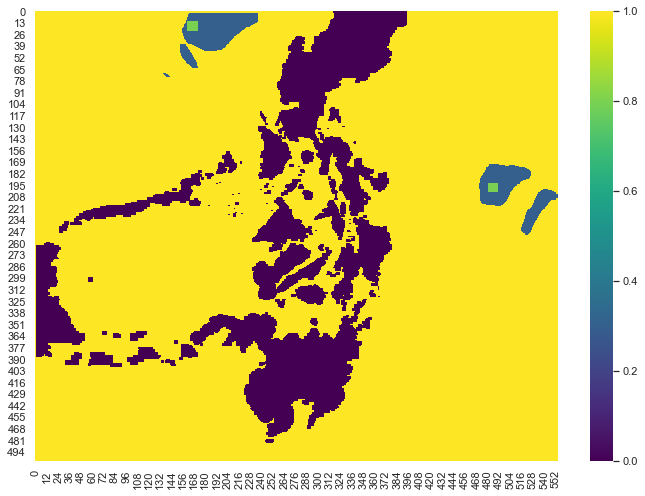

In [10]:
df_mask = pd.read_csv('./release_gp_homework_data/OceanFlow/mask.csv', names = [i for i in range(0, n_cols)])
df_mask2 = df_mask.copy()

df_mask2[coord_p1] = 0.3
df_mask2[coord_p2] = 0.3

df_mask2.loc[(point1[0]-5):(point1[0]+5), (point1[1]-5):(point1[1]+5)] = 0.8
df_mask2.loc[(point2[0]-5):(point2[0]+5), (point2[1]-5):(point2[1]+5)] = 0.8

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df_mask2, cmap='viridis')
plt.show()